In [1]:
# Import packages:

#import warnings
#warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets:

players = pd.read_csv(r'../datasets/players_clean.csv', low_memory=False)
stats = pd.read_csv(r'../datasets/stats_clean.csv')
games = pd.read_csv(r'../datasets/games_clean.csv')

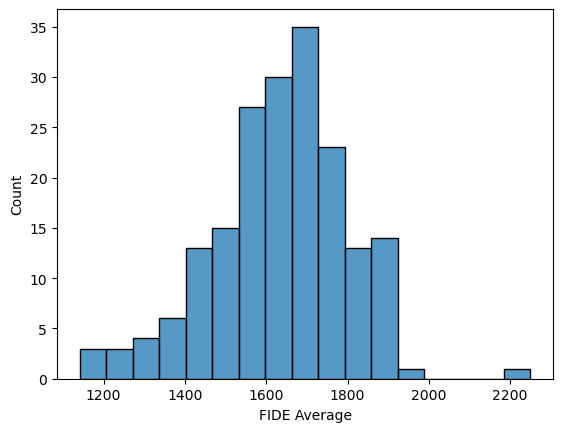

In [3]:
sns.histplot(data=stats, x = 'FIDE Average')
plt.show()

In [4]:
#holding off on this, Country might be a contributing variable, though likely a volatile one
stats_2 = stats.drop('Country', axis=1) 
stats_2

,Unnamed: 0.1,Unnamed: 0,#,Num Players,Women,% of Women,FIDE Average,GMs,IMs,FMs,WGMs,WIMs,WFMs,Age Avg
0,0,0,1,34497,5734,16.62,1666,236,522,1177,50,101,409,34
1,1,1,2,32735,3581,10.94,1275,64,114,83,9,41,42,27
2,2,2,3,26577,1751,6.59,1841,94,273,861,18,40,69,49
3,3,3,4,25009,1430,5.72,1429,55,134,365,2,14,37,42
4,4,4,5,23784,2143,9.01,1580,50,117,234,4,18,21,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,185,185,186,6,0,0.00,1820,0,0,0,0,0,0,31
184,186,186,187,4,0,0.00,1749,0,0,0,0,0,0,54
185,187,187,188,4,0,0.00,1556,0,0,0,0,0,0,38
186,188,188,189,3,0,0.00,1878,0,0,1,0,0,0,39


In [5]:
corr = stats_2.corr()
corr

,Unnamed: 0.1,Unnamed: 0,#,Num Players,Women,% of Women,FIDE Average,GMs,IMs,FMs,WGMs,WIMs,WFMs,Age Avg
Unnamed: 0.1,1.000000,1.000000,1.000000,-0.525801,-0.469350,-0.135470,0.046005,-0.508974,-0.520398,-0.469721,-0.439037,-0.530567,-0.347607,0.113638
Unnamed: 0,1.000000,1.000000,1.000000,-0.525801,-0.469350,-0.135470,0.046005,-0.508974,-0.520398,-0.469721,-0.439037,-0.530567,-0.347607,0.113638
#,1.000000,1.000000,1.000000,-0.525801,-0.469350,-0.135470,0.046005,-0.508974,-0.520398,-0.469721,-0.439037,-0.530567,-0.347607,0.113638
Num Players,-0.525801,-0.525801,-0.525801,1.000000,0.920168,-0.052895,-0.071449,0.783998,0.816500,0.800427,0.652406,0.783620,0.663664,0.044575
Women,-0.469350,-0.469350,-0.469350,0.920168,1.000000,0.066081,-0.098209,0.840744,0.847685,0.794101,0.781504,0.879170,0.842623,-0.078891
% of Women,-0.135470,-0.135470,-0.135470,-0.052895,0.066081,1.000000,-0.236568,0.019255,-0.015809,-0.048592,0.118513,0.104776,0.096334,-0.576983
FIDE Average,0.046005,0.046005,0.046005,-0.071449,-0.098209,-0.236568,1.000000,0.112279,0.116148,0.131290,0.095681,0.069354,0.046138,0.532940
GMs,-0.508974,-0.508974,-0.508974,0.783998,0.840744,0.019255,0.112279,1.000000,0.971773,0.903984,0.933943,0.943228,0.857166,0.046888
IMs,-0.520398,-0.520398,-0.520398,0.816500,0.847685,-0.015809,0.116148,0.971773,1.000000,0.957340,0.905017,0.939332,0.867504,0.096504
FMs,-0.469721,-0.469721,-0.469721,0.800427,0.794101,-0.048592,0.131290,0.903984,0.957340,1.000000,0.831257,0.865272,0.845983,0.137924


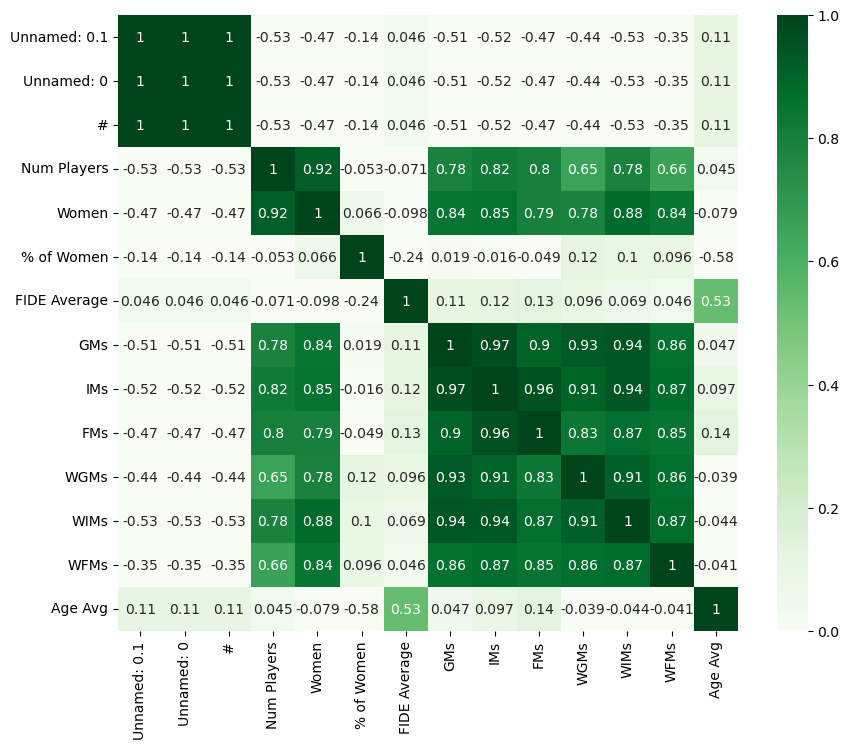

In [6]:
plt.figure(figsize=(10,8))

sns.heatmap(data=corr, cmap = 'Greens', annot=True, vmin=0)

plt.show()

C:\Users\joshu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


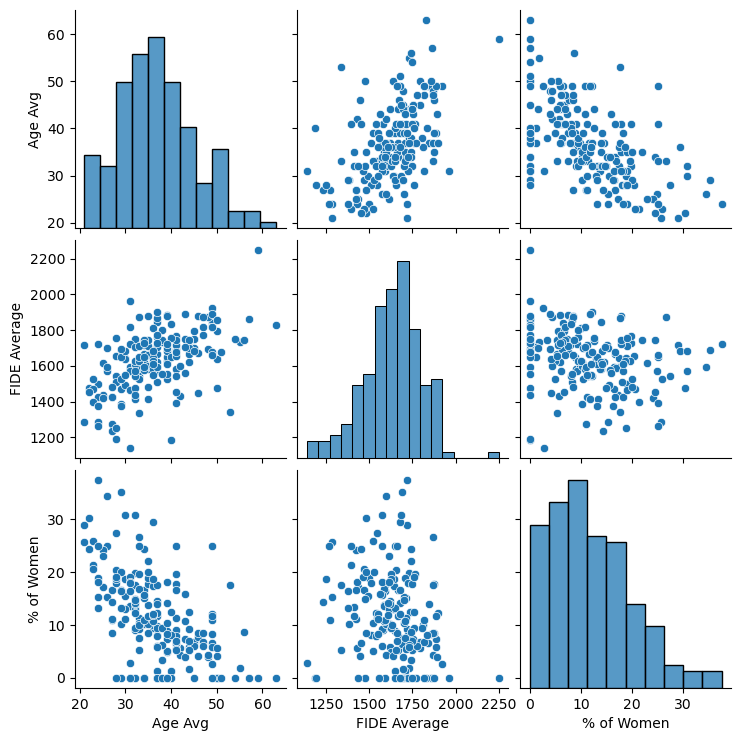

In [7]:
sns.pairplot(stats[['Age Avg', 'FIDE Average', '% of Women']])
plt.show()